**Fashion-MNIST - Evrişimli Sinir Ağı** 
---
[<img align="left" width="100" height="100" src="http://www.i2symbol.com/images/symbols/style-letters/circled_latin_capital_letter_a_u24B6_icon_128x128.png">](https://www.ayyucekizrak.com/)
[<img align="right" width="200" height="50"  src="https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png">](https://deeplearningturkiye.com/)


**Colab** için kimlik doğrulama işlemler...

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp_6flijie/pubring.gpg' created
gpg: /tmp/tmp_6flijie/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
datalab  drive


### Kütüphane kurulumu

In [0]:
!pip3 install -q keras

### Fashion MNIST veri setine bir gözatalım!


![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)
![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/embedding.gif)

**Gerekli paketler yükleniyor...**

In [0]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import load_model
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import random


Using TensorFlow backend.


**Verileri internet üzerinden çekelim!**

In [0]:
#Veri setlerini yükleme
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'eğitim örnekleri')
print(x_test.shape[0], 'test örnekleri')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 eğitim örnekleri
10000 test örnekleri
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Veriler içinden bir örnek görelim :)

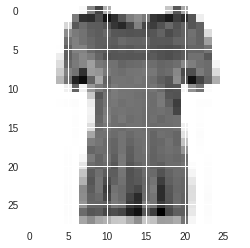

In [0]:
plt.imshow(x_train[10])

### 10 sınıftan oluşan Fashion MNIST veri kümesinde hangi sınıflar var bakalım!

In [0]:
# fashion mnist etiket isimleri
fashion_mnist_labels = np.array([
    'Tişört/Üst',
    'Pantolon',
    'Kazak',
    'Elbise',
    'Ceket',
    'Sandalet',
    'Gömlek',
    'Sneaker',
    'Çanta',
    'Bilekte Bot'])

**Daha önce eğitilmiş olan modelin ağırlıklarını` model_fashion-mnist_cnn_train2_epoch24.h5`dosyasından çekelim ve giriş görüntülerini model girişine uygun şekilde ön işlemlerden geçirelim!**

In [0]:
root = 'drive/Udemy_DerinOgrenmeyeGiris/Evrisimli_Sinir_Aglari/NesneTanima/save_models/'
model = load_model(root + 'model_fashion-mnist_cnn_train2_epoch24.h5')

    
def convertMnistData(image):
    img = image.astype('float32')
    img /= 255

    return image.reshape(1,28,28,1)

plt.figure(figsize=(16,16))

right = 0
mistake = 0
prefictionNum = 200

for i in range(prefictionNum):
    index = random.randint(0, x_test.shape[0])
    image = x_test[index]
    data = convertMnistData(image)

    plt.subplot(10, 10, i+1)
    plt.imshow(image,  cmap=cm.gray_r)
    plt.axis('off')

    ret = model.predict(data, batch_size=1) 
    #yazdır(ret)

    bestnum = 0.0
    bestclass = 0
    for n in [0,1,2,3,4,5,6,7,8,9]:
        if bestnum < ret[0][n]:
            bestnum = ret[0][n]
            bestclass = n

    if y_test[index] == bestclass:
        plt.title(fashion_mnist_labels[bestclass])
        right += 1
    else:
        #tahmin edilen sınıf != gerçek sınıf
        plt.title(fashion_mnist_labels[bestclass] + "!=" + fashion_mnist_labels[y_test[index]], color='#ff0000')
        mistake += 1
                                                                   
plt.show()
print("Doğru tahminlerin sayısı:", right)
print("Hata sayısı:", mistake)
print("Doğru tahmin oranı:", right/(mistake + right)*100, '%')